In [1]:
import os

CONFIG_PATH = os.path.join("C:\\Users\\Admin\\", "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join("C:\\Users\\Admin\\GroundingDINO\\", "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)


C:\Users\Admin\GroundingDINO\weights\groundingdino_swint_ogc.pth ; exist: True


final text_encoder_type: bert-base-uncased


['person']


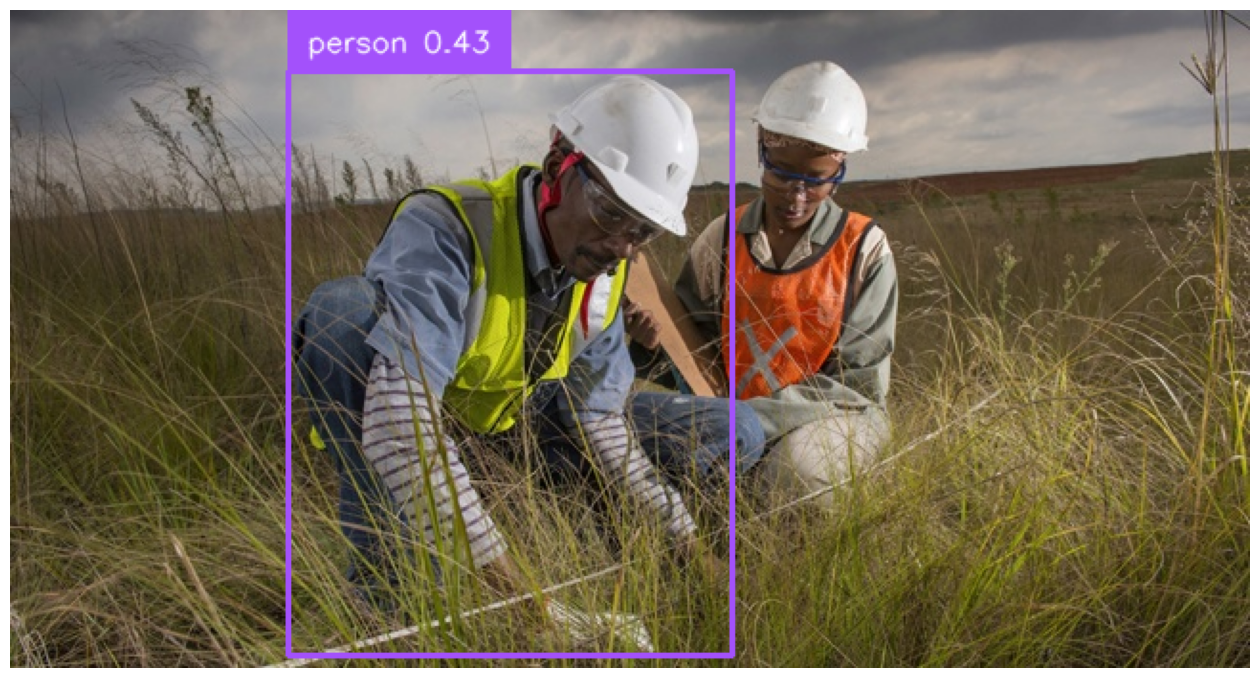

In [2]:
import os
import supervision as sv

# Polar Bear: id_1100727378131718145_2019-02-27.jpg, id_1083801064154021889_2019-01-11.jpg
# Poster with Person: id_1208886106512478208_2019-12-22.jpg
# Planet with red? water: id_1083901481311440896_2019-01-12.jpg
# Map: id_1211799376865005569_2019-12-31.jpg
# struggles with hurricanes/tornados kind of nature catastrophes

IMAGE_NAME = "dog-3.jpeg"
IMAGE_PATH = os.path.join("C:\\Users\\Admin\Documents\\Dataset_small\\", "id_1206609185447849986_2019-12-16.jpg")

TEXT_PROMPT = "cow, glacier, pig, tomato, bread, visualization, bear, tree, person, plant, planet, hurricane, tornado, bird, flower, dog, earth, planet, poster, iceberg, cylcone, fire, water, penguin, seal, dolphin, turtle, bird, rabbit, bat, volcano, cat, car, tv, tiger, seagull, cow, monkey, bag"
BOX_TRESHOLD = 0.37
TEXT_TRESHOLD = 0.37

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
print(phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))
